<a href="https://colab.research.google.com/github/rahmarr/siti-rahmawati---2306146---latihan-workflow-AI/blob/main/2306146_latihan%20workflow%20AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset berhasil dibuat dan disimpan di Google Colab sebagai data_penjualan_latihan.csv

Data setelah transformasi dan pembersihan:
     Tanggal         Produk  Jumlah_Terjual  Stok  Harga_Satuan  \
0 2024-01-01          Beras               5     2         15000   
1 2024-01-02           Gula              12    10         20000   
2 2024-01-03  Minyak Goreng               8     3         18000   
3 2024-01-04          Sabun              15    12         25000   
4 2024-01-05        Shampoo              10     4         22000   

   Total_Penjualan  Keuntungan  
0            75000       25000  
1           240000      120000  
2           144000       64000  
3           375000      225000  
4           220000      120000  

Akurasi Model: 100.00%

Prediksi Restock: Perlu Restock


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


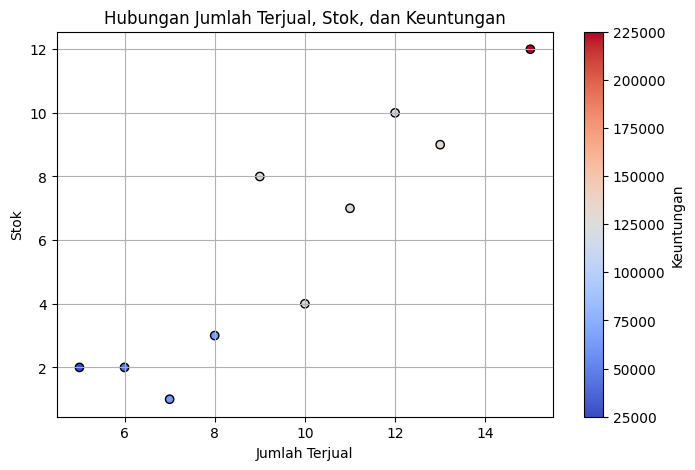


Model berhasil disimpan sebagai /content/model_decision_tree.pkl


In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Digitalise & Collect - Buat Dataset Penjualan
data = {
    'Tanggal': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Produk': ['Beras', 'Gula', 'Minyak Goreng', 'Sabun', 'Shampoo', 'Susu', 'Teh', 'Kopi', 'Garam', 'Mie Instan'],
    'Jumlah_Terjual': [5, 12, 8, 15, 10, 7, 11, 9, 6, 13],
    'Stok': [2, 10, 3, 12, 4, 1, 7, 8, 2, 9],
    'Harga_Satuan': [15000, 20000, 18000, 25000, 22000, 19000, 21000, 23000, 17000, 20000]
}
df = pd.DataFrame(data)
df.to_csv('/content/data_penjualan_latihan.csv', index=False)
print("Dataset berhasil dibuat dan disimpan di Google Colab sebagai data_penjualan_latihan.csv")

# 2. Transform - Membersihkan dan Mengolah Data
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Total_Penjualan'] = df['Jumlah_Terjual'] * df['Harga_Satuan']
df['Keuntungan'] = df['Total_Penjualan'] - (df['Jumlah_Terjual'] * 10000)  # Asumsi modal Rp10.000

# Menghapus data yang memiliki stok negatif atau tidak wajar
df = df[df['Stok'] >= 0]

# Menangani data yang hilang (jika ada)
# df.fillna(df.median(), inplace=True) # Original line causing the error
# Applying median to only numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())  # Fill NaN in numeric cols with median


print("\nData setelah transformasi dan pembersihan:")
print(df.head())

# 3. Train - Latih Model AI
# Menentukan fitur (X) dan target (y)
X = df[['Jumlah_Terjual', 'Stok']]
y = (df['Stok'] < 5).astype(int)  # 1 jika perlu restock, 0 jika tidak

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Decision Tree
model = DecisionTreeClassifier(max_depth=4)  # Menambahkan batasan kedalaman pohon
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")

# 4. Execute - Prediksi Restock
sample_data = np.array([[8, 3]])  # Jumlah Terjual: 8, Stok: 3
prediction = model.predict(sample_data)
status = "Perlu Restock" if prediction[0] == 1 else "Tidak Perlu Restock"
print(f"\nPrediksi Restock: {status}")

# 5. Provide Insights - Visualisasi Data
plt.figure(figsize=(8, 5))
plt.scatter(df['Jumlah_Terjual'], df['Stok'], c=df['Keuntungan'], cmap='coolwarm', edgecolors='k')
plt.colorbar(label='Keuntungan')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Stok')
plt.title('Hubungan Jumlah Terjual, Stok, dan Keuntungan')
plt.grid(True)
plt.show()

# 6. Simpan Model
import pickle
with open('/content/model_decision_tree.pkl', 'wb') as file:
    pickle.dump(model, file)
print("\nModel berhasil disimpan sebagai /content/model_decision_tree.pkl")